# Intégration numérique en Python

##### Germain Salvato-Vallverdu [germain.vallverdu@univ-pau.fr](germain.vallverdu@univ-pau.fr)

L'objectif de ce TP est de mettre en pratique le langage python pour intégrer numériquement une fonction.
Après avoir étudier la fonction des méthodes basiques comme la méthode des trapèzes ou celle de Simpson
seront implémentées. Puis les fonctions disponnibles dans numpy et scipy seront utilisées pour réaliser
les mêmes opérations. La librairie matplotlib sera utilisée tout au long du notebook pour faire des
représentations graphiques.

Note : Ce notebook est compatible python2 et python3. Il est recommandé d'utiliser python3.

### Sommaire

1. [Modules python](#Modules-python)
2. [Étude d'une fonction](#Étude-d'une-fonction)
3. [Intégration analytique](#Intégration-analytique)
4. [Intégration numérique](#Intégration-numérique)
    1. [Rappels mathématiques](#Rappels-mathématiques)
    2. [À la main](#À-la-main)
    3. [Avec numpy](#Avec-numpy)

### Modules python

Commençons par charger les modules nécessaires : matplotlib pour les représentations graphiques et numpy pour les approches numériques. Ces modules peuvent être chargés selon

```python
import numpy as np
import matplotlib.pyplot as plt
```
Avec ipython ou jupyter cela peut se faire via une commande magique. Ces commandes commence par un %. L'option `inline` permet d'intégrer les graphiques dans le notebook.

In [3]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


Note sur la documentation :

```
  --no-import-all  Prevent IPython from performing `import *` into the interactive namespace.
```

## Étude d'une fonction

Dans cet exemple, nous étudierons la fonction suivante :
\begin{equation}
    f(x) = (x^2 - 3x - 6) \exp\left(-x\right)
\end{equation}
Cette fonction est intégrable analytiquement. Il est alors nécessaires de faire deux intégrations par partie successives.

Commençons par définir une fonction qui renvoie l'image de la fonction $f$ pour une valeur de $x$. La fonction exponnentielle n'est pas disponnible dans python par défaut, il faut la prendre dans le module numpy :

In [112]:
def fonction(x):
    """ Retourne la valeur de la fonction en x """
    return (x**2 - 3*x - 6) * np.exp(-x)

Utilisons maintenant matplotlib pour représenter la fonction entre dans l'intervalle $[0;5]$.

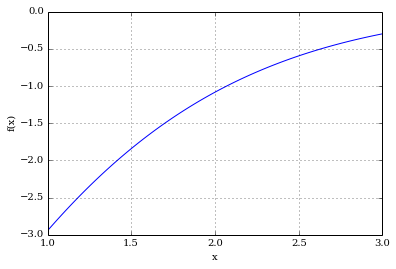

In [113]:
x = np.linspace(1, 3, 100)
plt.plot(x, fonction(x))
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")

## Intégration analytique

L'intégration analytique donne :

\begin{equation}
    \int_1^3 (x^2 - 3x - 6) \exp\left(-x\right) dx = -2.525369
\end{equation}

In [83]:
analytique = -2.525369

## Intégration numérique

### Rappels mathématiques



### Par la méthode des trapèzes

Dans la méthode des trapèzes, l'intervalle d'intégration est découpé en petits intervalles. On dit que la fonction est discrétisée. Sur chaque petit intervalle, la fonction est approximée par une droite. L'intégrale est évaluée en calculant l'aire sous la courbe comme la somme des petites aires $S_i$, sur chaque petit intervalle, entre la droite qui approxime la courbe et l'axe des abscisses.

![trapeze](./trapeze.png)

Chaque point de la courbe est repéré par son indice $i$.

L'aire d'un trapèze sur le petit intervalle compris entre $x_{i+1}$ et $x_i$ est donnée par :
\begin{equation}
    S_i = (x_{i+1} - x_i)\frac{f(x_{i+1}) + f(x_i)}{2}
\end{equation}
L'intégrale est alors la somme des petites aires $S_i$.
\begin{equation}
    I = \sum_{i=1}^{N-1} S_i = \sum_{i=1}^{N-1} (x_{i+1} - x_i)\frac{f(x_{i+1}) + f(x_i)}{2}
\end{equation}
Ce qui peut se simplifier de la façon suivante :
\begin{equation}
    I = h\left(\frac{f(a)+f(b)}{2} + \sum_{i=2}^{N-1}f(x_i)\right)
\end{equation}
Avec $h$ la largeur des petits intervalles : le pas d'intégration.

### Mise en œuvre de la méthode des trapèze.

On définit les bornes d'intégration :

In [84]:
a, b = 1, 3

On choisit le nombre de valeurs de x :

In [141]:
n = 201

Calcul de $h$, le pas. Avec $n$ valeurs de $x$, on a $n-1$ intervalles.

In [142]:
h = (b - a) / (n - 1)
print(h)

0.01


On calcule les valeurs des abscisses $x_i$ :

In [154]:
x = np.linspace(a, b, n)
print(len(x), x[0], x[1], x[-1])

201 1.0 1.01 3.0


#### Première possibilité :

Voici une première façon de faire. Il faut bien penser à initialiser la variable contenant le résultat de l'intégration.

In [150]:
integrale = 0
for i in range(n-1):
    integrale += (x[i+1] - x[i])*(fonction(x[i+1]) + fonction(x[i])) / 2
print(integrale)

-2.52538674545


#### Seconde possibilité :

Seconde façon de faire avec la formule simplifiée.

In [155]:
integrale = (fonction(a) + fonction(b)) / 2
for xi in x[1:n-1]:
    integrale += fonction(xi)
integrale *= h
print(integrale)

-2.52538674545


In [1]:
integrale = (fonction(a) + fonction(b)) / 2
for xi in x[1:n-1]:
    integrale += fonction(xi)
integrale *= h
print(integrale)


NameError: name 'fonction' is not defined